In [1068]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import seaborn as sns

import umap
import math

import warnings
warnings.filterwarnings('ignore')

In [836]:
cancer = load_breast_cancer()
data = pd.DataFrame(cancer.data)
data.columns = cancer.feature_names
data['target'] = cancer.target

In [837]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [838]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [1730]:
def sigmoid_function(z):
    if z >= 0:
        return 1 / (1 + np.exp(-z))
    else:
        return np.exp(z) / (1 + np.exp(z))

def sigmoid(z):
    return np.array([sigmoid_function(value) for value in z])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(x, y, w, b):

    z = np.dot(w,x.T) + b
    y_hat = sigmoid(z)
    cost = -np.mean(y * np.log(y_hat + 1e-9) + (1-y) * np.log(1 - y_hat + 1e-9))

    return  cost

def derivative_cost_function(x, y, w, b):

    z = np.dot(w,x.T) + b
    err = sigmoid(z) - y
    d_cost_w = np.array([np.mean(feature) for feature in np.dot(x.T, err)])
    d_cost_b = np.mean(err)

    return d_cost_w, d_cost_b

def gradient_descent(x, y, learning_rate, epocs=10):
    m, n = x.shape
    w = np.zeros((n,))
    b = 0

    learning_curve = []
    w_history = []

    for i in range(epocs):
        d_cost_w, d_cost_b = derivative_cost_function(x, y, w, b)
        w = w - learning_rate * d_cost_w
        b = b - learning_rate * d_cost_b

        learning_curve.append(cost_function(x, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(epocs/10) == 0 or i == (epocs-1):
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(learning_curve[-1]):8.2f}, w {w if n==2 else None}, b {b}")

    return w, b, learning_curve, w_history


def predict(x, w, b, threshold=0.5):
    y_hat = sigmoid(np.dot(x,w) + b)
    y_hat = (y_hat >= threshold).astype(int)
    return y_hat

def predict_proba(x, w, b):
    y_proba = np.zeros((x.shape[0], 2))
    y_hat = sigmoid(np.dot(x,w) + b)
    y_proba[:, 1] = y_hat
    y_proba[:, 0] = 1 - y_hat
    return y_proba

def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

def normalize(x):
    return (x - x.mean(axis=0)) / (x.std(axis=0) + 1e-8)


def plot_decision_boundary(X, Y, w, b):
    c = -b/w[1]
    m = -w[0]/w[1]

    xmin, xmax = X[:,0].min(), X[:,0].max()
    ymin, ymax = X[:,1].min(), X[:,1].max()
    xd = np.array([xmin, xmax])
    yd = m * xd + c

    plt.plot(xd, yd, 'k', lw=1, ls='--')
    plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
    plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

    plt.scatter(*X[Y==0].T, s=8, alpha=0.5)
    plt.scatter(*X[Y==1].T, s=8, alpha=0.5)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.ylabel(r'$x_2$')
    plt.xlabel(r'$x_1$')

def plot_results(X, y, learning_curve, w, b):
    plt.figure(figsize = (20,6))

    plt.subplot(1,2,1)
    sns.lineplot(x=np.arange(len(learning_curve)),y=learning_curve)
    plt.title('Learning Curve', fontsize = 20)

    if X.shape[1] == 2:
        plt.subplot(1,2,2)
        plot_decision_boundary(X, y, w, b)
        plt.title('Decision boundary', fontsize = 20)

In [1723]:
X = data.drop("target", axis=1).to_numpy()[:,:2]
y = data['target'].to_numpy()

In [1724]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.3, random_state = 31)

In [1725]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [1726]:
learning_rate = 0.01
epocs = 1000
w, b, learning_curve, history_f_function = gradient_descent(X_train, y_train, learning_rate, epocs)

Iteration    0: Cost     0.36, w [-1.41466299 -0.74838208], b 0.0012814070351758794
Iteration  100: Cost     0.28, w [-3.85399569 -0.8311259 ], b 0.058204053076428584
Iteration  200: Cost     0.28, w [-3.82048409 -0.8310176 ], b 0.10683880679415544
Iteration  300: Cost     0.27, w [-3.78849372 -0.83097046], b 0.1517689842726334
Iteration  400: Cost     0.27, w [-3.76111728 -0.83141585], b 0.19325271807747246
Iteration  500: Cost     0.27, w [-3.73771881 -0.83225105], b 0.2315326968650221
Iteration  600: Cost     0.27, w [-3.71773135 -0.83338704], b 0.266841373170151
Iteration  700: Cost     0.27, w [-3.70066216 -0.83474878], b 0.2993994922071191
Iteration  800: Cost     0.27, w [-3.68608552 -0.8362737 ], b 0.3294152107150253
Iteration  900: Cost     0.27, w [-3.67363521 -0.83791008], b 0.35708369914243526
Iteration  999: Cost     0.27, w [-3.66309565 -0.83959837], b 0.3823422291744633


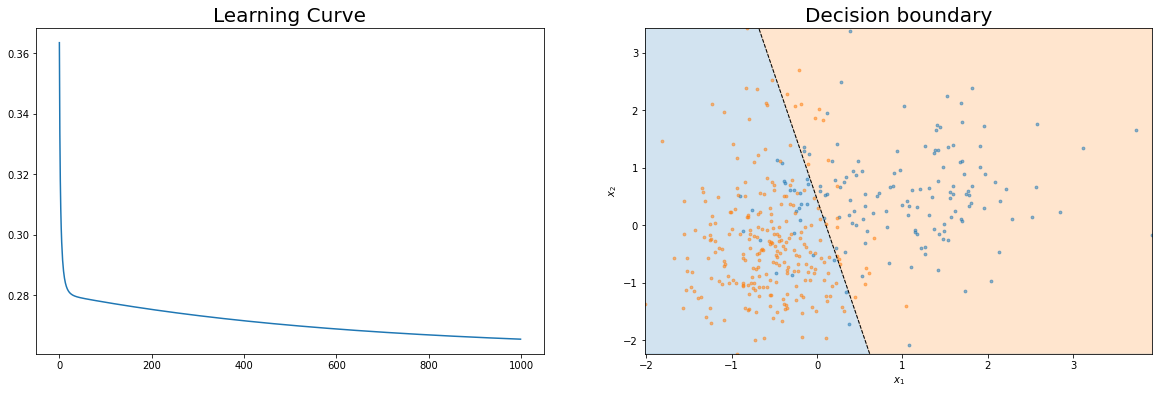

In [1727]:
plot_results(X_train, y_train, learning_curve, w, b)

In [1728]:
y_hat = predict(X_train, w, b)
accuracy(y_train, y_hat)

0.8819095477386935

In [1729]:
y_hat = predict(X_test, w, b)
accuracy(y_test, y_hat)

0.9122807017543859

## Logistic Regression Class

In [1761]:
class LogisticRegression:

    def __init__(self, epocs=100) -> None:
        self.epocs = epocs
        self.w = None
        self.b = 0
        self.learning_curve = []

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _cost_function(self, x, y):

        z = np.dot(self.w,x.T) + self.b
        y_hat = self._sigmoid(z)
        cost = -np.mean(y * np.log(y_hat + 1e-9) + (1-y) * np.log(1 - y_hat + 1e-9))

        return cost

    def _derivative_cost_function(self, X, y):

        z = np.dot(self.w,X.T) + self.b
        err = self._sigmoid(z) - y
        d_cost_w = np.array([np.mean(feature) for feature in np.dot(X.T, err)])
        d_cost_b = np.mean(err)

        return d_cost_w, d_cost_b

    def fit(self, X, y, learning_rate=1e-3) -> None:
        m, n = X.shape
        self.w = np.zeros((n,))
        self.b = 0

        for _ in range(self.epocs):
            d_cost_w, d_cost_b = self._derivative_cost_function(X, y)
            self.w = self.w - learning_rate * d_cost_w
            self.b = self.b - learning_rate * d_cost_b

            self.learning_curve.append(self._cost_function(X, y))

    def predict(self, X, threshold=0.5):
        y_hat = self._sigmoid(np.dot(self.w,X.T) + self.b)
        y_hat = (y_hat >= threshold).astype(int)
        return y_hat

    def predict_proba(self, X):
        y_proba = np.zeros((X.shape[0], 2))
        y_hat = self._sigmoid(np.dot(self.w,X.T) + self.b)
        y_proba[:, 1] = y_hat
        y_proba[:, 0] = 1 - y_hat
        return y_proba

    def accuracy(self, y, y_hat):
        accuracy = np.sum(y == y_hat) / len(y)
        return accuracy


### Data

In [1783]:
X = data.drop("target", axis=1).to_numpy()[:,:2]
y = data['target'].to_numpy()

In [1784]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.3, random_state = 31)

In [1785]:
X_train = normalize(X_train)
X_test = normalize(X_test)

### Training

In [1786]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

### Evaluation

In [1787]:
y_hat = lr.predict(X_train)
print("Accuracy train:", lr.accuracy(y_train, y_hat))
y_hat = lr.predict(X_test)
print("Accuracy test:", lr.accuracy(y_test, y_hat))

Accuracy train: 0.8768844221105527
Accuracy test: 0.8771929824561403


### Learning Curve and Decision boundary

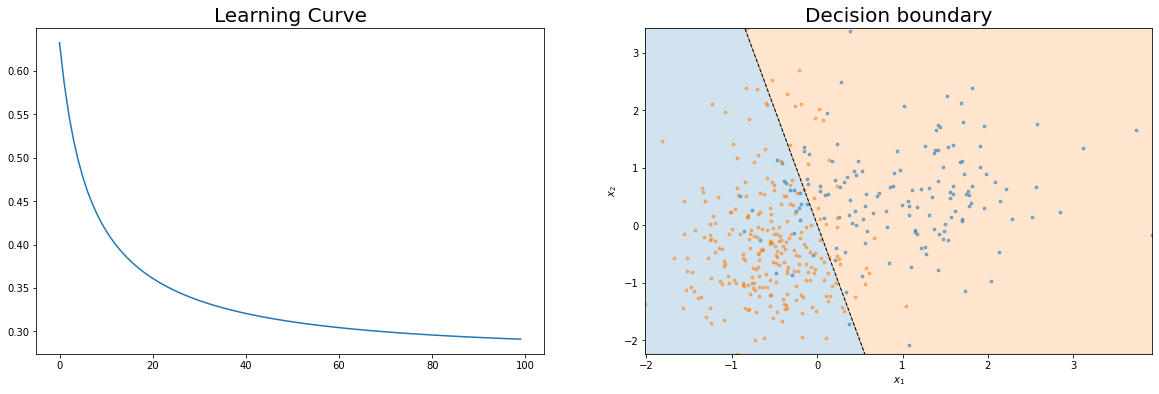

In [1788]:
plot_results(X_train, y_train, lr.learning_curve, lr.w, lr.b)